# INM363 Deep Active Learning Network for Medical Image Segmentation

## Results

### Aaron Mir (Student Number: 160001207)

### https://github.com/Assassinsarms/Deep-Active-Learning-Network-for-Medical-Image-Segmentation

In [7]:
from glob import glob
import os
import errno
import sys
import time
from collections import OrderedDict
import imageio
import math

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave 

import pickle
import pandas as pd

In [3]:
TRAIN_IMG_DIR = pickle.load(open('data\\train_val\\img\\'+'train_val.data', 'rb'))
TRAIN_LABEL_DIR = pickle.load(open('data\\train_val\\label\\'+'train_val.mask', 'rb'))
UNLABELLED_IMG_DIR = pickle.load(open('data\\unlabelled\\img\\'+'unlabelled.data', 'rb'))
UNLABELLED_LABEL_DIR = pickle.load(open('data\\unlabelled\\label\\'+'unlabelled.mask', 'rb'))
TEST_IMG_DIR = pickle.load(open('data\\test\\img\\'+'test.data', 'rb'))
TEST_LABEL_DIR = pickle.load(open('data\\test\\label\\'+'test.mask', 'rb'))

## Training and Validation Loss and Mean Dice Score for Base Training

In [18]:
training_log_df = pd.read_csv('base_training_results\\log.csv')

In [19]:
training_log_df.head()

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
0,0.0,0.001,1.162492,0.218158,0.098907,1.704908,0.049399,0.085996
1,1.0,0.001,1.016108,0.352841,0.150386,0.961865,0.405781,0.184081
2,2.0,0.001,0.896945,0.407199,0.225784,0.843503,0.465812,0.262248
3,3.0,0.001,0.768668,0.472474,0.342770,0.724799,0.492958,0.383875
4,4.0,0.001,0.663837,0.484587,0.453882,0.656494,0.538079,0.474462


In [20]:
training_loss = training_log_df['loss'].to_numpy()
training_dice = training_log_df['dice'].to_numpy()
validation_loss = training_log_df['val_loss'].to_numpy()
validation_dice = training_log_df['val_dice'].to_numpy()

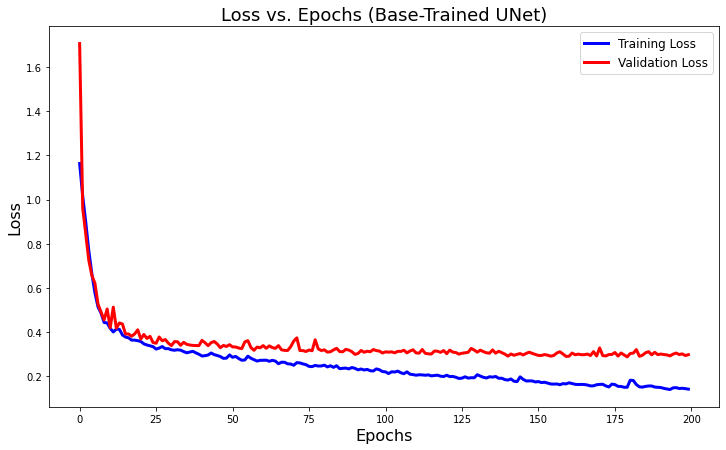

In [21]:
plt.figure(figsize=(12, 7))
plt.plot(training_loss, 'b', linewidth=3.0, label='Training Loss')
plt.plot(validation_loss, 'r', linewidth=3.0, label='Validation Loss')
plt.title('Loss vs. Epochs (Base-Trained UNet)', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('base_training_results/LossvsEpochsUNet.png')
plt.show()

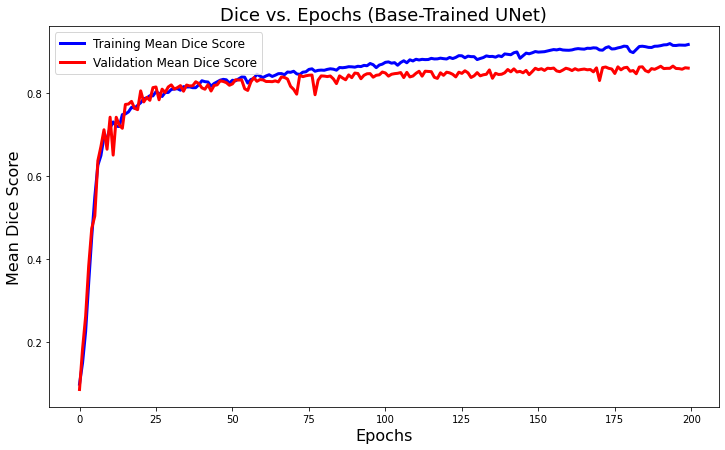

In [22]:
plt.figure(figsize=(12, 7))
plt.plot(training_dice, 'b', linewidth=3.0, label='Training Mean Dice Score')
plt.plot(validation_dice, 'r', linewidth=3.0, label='Validation Mean Dice Score')
plt.title('Dice vs. Epochs (Base-Trained UNet)', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Mean Dice Score', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('base_training_results\DicevsEpochsUNet.png')
plt.show()

## Uncertainty Maps evolution over 10 iterations

In [128]:
example_slice = np.load(UNLABELLED_IMG_DIR[0])
example_mask = np.load(UNLABELLED_LABEL_DIR[0]) 

In [29]:
avg_predictions_iteration_1 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_0\\avg_predictions.npy")
avg_predictions_iteration_2 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_1\\avg_predictions.npy")
avg_predictions_iteration_3 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_2\\avg_predictions.npy")
avg_predictions_iteration_4 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_3\\avg_predictions.npy")
avg_predictions_iteration_5 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_4\\avg_predictions.npy")
avg_predictions_iteration_6 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_5\\avg_predictions.npy")
avg_predictions_iteration_7 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_6\\avg_predictions.npy")
avg_predictions_iteration_8 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_7\\avg_predictions.npy")
avg_predictions_iteration_9 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_8\\avg_predictions.npy")
avg_predictions_iteration_10 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_9\\avg_predictions.npy")

In [37]:
uncertainty_maps_iteration_1 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_0\\uncertainty_maps.npy")
uncertainty_maps_iteration_2 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_1\\uncertainty_maps.npy")
uncertainty_maps_iteration_3 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_2\\uncertainty_maps.npy")
uncertainty_maps_iteration_4 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_3\\uncertainty_maps.npy")
uncertainty_maps_iteration_5 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_4\\uncertainty_maps.npy")
uncertainty_maps_iteration_6 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_5\\uncertainty_maps.npy")
uncertainty_maps_iteration_7 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_6\\uncertainty_maps.npy")
uncertainty_maps_iteration_8 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_7\\uncertainty_maps.npy")
uncertainty_maps_iteration_9 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_8\\uncertainty_maps.npy")
uncertainty_maps_iteration_10 = np.load("example_avg_predictions_uncertainty_maps\\AL_iteration_9\\uncertainty_maps.npy")

In [138]:
rgbPic_gt = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration2 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration4 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration6 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration8 = np.zeros([160, 160, 3], dtype=np.uint8)
rgbPic_avg_iteration10 = np.zeros([160, 160, 3], dtype=np.uint8)
for idx in range(avg_predictions_iteration_2.shape[2]):
        for idy in range(avg_predictions_iteration_2.shape[3]):
            #(ED, peritumoral edema) (label 2) green
            if example_mask[idx,idy] == 2:
                rgbPic_gt[idx,idy, 0] = 0
                rgbPic_gt[idx,idy, 1] = 128
                rgbPic_gt[idx,idy, 2] = 0
            if avg_predictions_iteration_2[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration2[idx, idy, 0] = 0
                rgbPic_avg_iteration2[idx, idy, 1] = 128
                rgbPic_avg_iteration2[idx, idy, 2] = 0
            if avg_predictions_iteration_4[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration4[idx, idy, 0] = 0
                rgbPic_avg_iteration4[idx, idy, 1] = 128
                rgbPic_avg_iteration4[idx, idy, 2] = 0
            if avg_predictions_iteration_6[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration6[idx, idy, 0] = 0
                rgbPic_avg_iteration6[idx, idy, 1] = 128
                rgbPic_avg_iteration6[idx, idy, 2] = 0
            if avg_predictions_iteration_8[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration8[idx, idy, 0] = 0
                rgbPic_avg_iteration8[idx, idy, 1] = 128
                rgbPic_avg_iteration8[idx, idy, 2] = 0
            if avg_predictions_iteration_10[0,0,idx,idy] > 0.5:
                rgbPic_avg_iteration10[idx, idy, 0] = 0
                rgbPic_avg_iteration10[idx, idy, 1] = 128
                rgbPic_avg_iteration10[idx, idy, 2] = 0
            #(NET, non-enhancing tumor) (label 1) red
            if example_mask[idx,idy] == 1:
                rgbPic_gt[idx,idy, 0] = 255
                rgbPic_gt[idx,idy, 1] = 0
                rgbPic_gt[idx,idy, 2] = 0
            if avg_predictions_iteration_2[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration2[idx, idy, 0] = 255
                rgbPic_avg_iteration2[idx, idy, 1] = 0
                rgbPic_avg_iteration2[idx, idy, 2] = 0
            if avg_predictions_iteration_4[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration4[idx, idy, 0] = 255
                rgbPic_avg_iteration4[idx, idy, 1] = 0
                rgbPic_avg_iteration4[idx, idy, 2] = 0
            if avg_predictions_iteration_6[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration6[idx, idy, 0] = 255
                rgbPic_avg_iteration6[idx, idy, 1] = 0
                rgbPic_avg_iteration6[idx, idy, 2] = 0
            if avg_predictions_iteration_8[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration8[idx, idy, 0] = 255
                rgbPic_avg_iteration8[idx, idy, 1] = 0
                rgbPic_avg_iteration8[idx, idy, 2] = 0
            if avg_predictions_iteration_10[0,1,idx,idy] > 0.5:
                rgbPic_avg_iteration10[idx, idy, 0] = 255
                rgbPic_avg_iteration10[idx, idy, 1] = 0
                rgbPic_avg_iteration10[idx, idy, 2] = 0
            #(ET, enhancing tumor)(label 4) yellow
            if example_mask[idx,idy] == 4:
                rgbPic_gt[idx,idy, 0] = 255
                rgbPic_gt[idx,idy, 1] = 255
                rgbPic_gt[idx,idy, 2] = 0
            if avg_predictions_iteration_2[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration2[idx, idy, 0] = 255
                rgbPic_avg_iteration2[idx, idy, 1] = 255
                rgbPic_avg_iteration2[idx, idy, 2] = 0
            if avg_predictions_iteration_4[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration4[idx, idy, 0] = 255
                rgbPic_avg_iteration4[idx, idy, 1] = 255
                rgbPic_avg_iteration4[idx, idy, 2] = 0
            if avg_predictions_iteration_6[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration6[idx, idy, 0] = 255
                rgbPic_avg_iteration6[idx, idy, 1] = 255
                rgbPic_avg_iteration6[idx, idy, 2] = 0
            if avg_predictions_iteration_8[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration8[idx, idy, 0] = 255
                rgbPic_avg_iteration8[idx, idy, 1] = 255
                rgbPic_avg_iteration8[idx, idy, 2] = 0
            if avg_predictions_iteration_10[0,2,idx,idy] > 0.5:
                rgbPic_avg_iteration10[idx, idy, 0] = 255
                rgbPic_avg_iteration10[idx, idy, 1] = 255
                rgbPic_avg_iteration10[idx, idy, 2] = 0

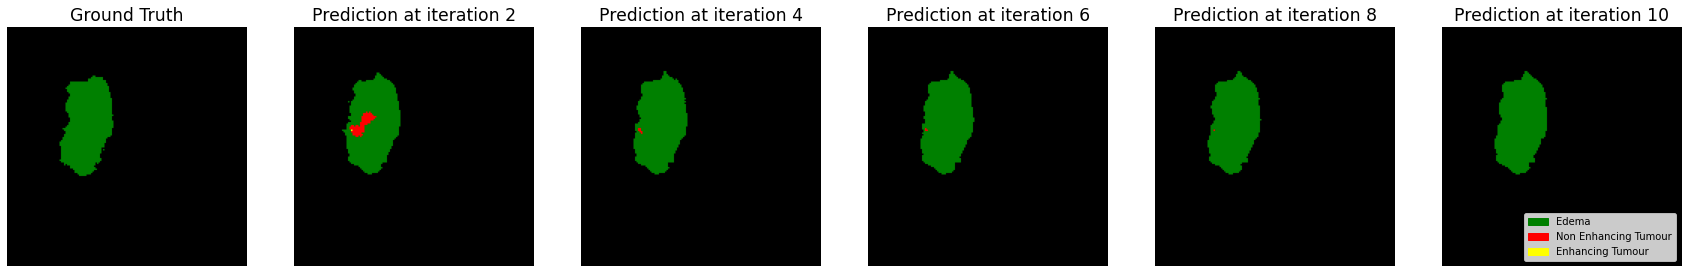

In [249]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(1,6, figsize=(30,30))
axs[0].imshow(rgbPic_gt)
axs[0].set_title("Ground Truth", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(rgbPic_avg_iteration2)
axs[1].set_title("Prediction at iteration 2", size ='xx-large')
axs[1].axis("off")
axs[2].imshow(rgbPic_avg_iteration4)
axs[2].set_title("Prediction at iteration 4", size ='xx-large')
axs[2].axis("off")
axs[3].imshow(rgbPic_avg_iteration6)
axs[3].set_title("Prediction at iteration 6", size ='xx-large')
axs[3].axis("off")
axs[4].imshow(rgbPic_avg_iteration8)
axs[4].set_title("Prediction at iteration 8", size ='xx-large')
axs[4].axis("off")
axs[5].imshow(rgbPic_avg_iteration10)
axs[5].set_title("Prediction at iteration 10", size ='xx-large')
axs[5].axis("off")
df_legend = pd.DataFrame([[0, [0, 128, 0], 'Edema'],
                          [1, [255, 0, 0], 'Non Enhancing Tumour'],
                          [2, [255, 255, 0], 'Enhancing Tumour']],
                         columns=['key', 'color', 'name'])
handles_1 = [Rectangle((0, 0), 1, 1, color=[c / 255 for c in color_list]) for color_list in df_legend['color']]
labels = df_legend['name']
plt.legend(handles_1, labels, loc='lower right')
plt.show()

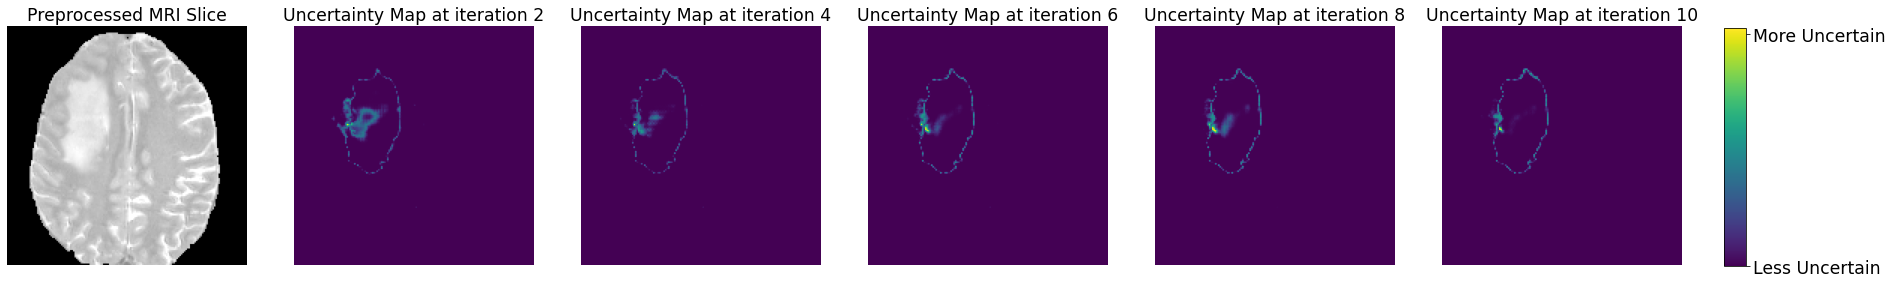

In [222]:
fig, axs = plt.subplots(1,6, figsize=(30,30))
axs[0].imshow(example_slice[:,:,3], cmap='gray')
axs[0].set_title("Preprocessed MRI Slice", size ='xx-large')
axs[0].axis("off")
axs[1].imshow(uncertainty_maps_iteration_2[0])
axs[1].set_title("Uncertainty Map at iteration 2", size ='xx-large')
axs[1].axis("off")
axs[2].imshow(uncertainty_maps_iteration_4[0])
axs[2].set_title("Uncertainty Map at iteration 4", size ='xx-large')
axs[2].axis("off")
axs[3].imshow(uncertainty_maps_iteration_6[0])
axs[3].set_title("Uncertainty Map at iteration 6", size ='xx-large')
axs[3].axis("off")
axs[4].imshow(uncertainty_maps_iteration_8[0])
axs[4].set_title("Uncertainty Map at iteration 8", size ='xx-large')
axs[4].axis("off")
im = axs[5].imshow(uncertainty_maps_iteration_10[0])
axs[5].set_title("Uncertainty Map at iteration 10", size ='xx-large')
axs[5].axis("off")
cbar_ax = fig.add_axes([0.92, 0.447, 0.01, 0.11])
cbar = fig.colorbar(im, cax=cbar_ax, fraction=0.046, pad=0.04, ticks = [0, 0.7])
cbar.ax.set_yticklabels(['Less Uncertain', 'More Uncertain'])
cbar.ax.tick_params(labelsize='xx-large')
plt.show()

## Active Learning vs. Random Baseline

In [11]:
mean_WT_dice_active = np.load("active_learning_results\\mean_WT_dice.npy")
mean_TC_dice_active = np.load("active_learning_results\\mean_TC_dice.npy")
mean_ET_dice_active = np.load("active_learning_results\\mean_ET_dice.npy")
mean_WT_PPV_active = np.load("active_learning_results\\mean_WT_PPV.npy")
mean_TC_PPV_active = np.load("active_learning_results\\mean_TC_PPV.npy")
mean_ET_PPV_active = np.load("active_learning_results\\mean_ET_PPV.npy")
mean_WT_sensitivity_active = np.load("active_learning_results\\mean_WT_sensitivity.npy")
mean_TC_sensitivity_active = np.load("active_learning_results\\mean_TC_sensitivity.npy")
mean_ET_sensitivity_active = np.load("active_learning_results\\mean_ET_sensitivity.npy")
mean_WT_Hausdorff_active = np.load("active_learning_results\\mean_WT_Hausdorff.npy")
mean_TC_Hausdorff_active = np.load("active_learning_results\\mean_TC_Hausdorff.npy")
mean_ET_Hausdorff_active = np.load("active_learning_results\\mean_ET_Hausdorff.npy")

mean_WT_dice_random = np.load("random_learning_results\\mean_WT_dice.npy")
mean_TC_dice_random = np.load("random_learning_results\\mean_TC_dice.npy")
mean_ET_dice_random = np.load("random_learning_results\\mean_ET_dice.npy")
mean_WT_PPV_random = np.load("random_learning_results\\mean_WT_PPV.npy")
mean_TC_PPV_random = np.load("random_learning_results\\mean_TC_PPV.npy")
mean_ET_PPV_random = np.load("random_learning_results\\mean_ET_PPV.npy")
mean_WT_sensitivity_random = np.load("random_learning_results\\mean_WT_sensitivity.npy")
mean_TC_sensitivity_random = np.load("random_learning_results\\mean_TC_sensitivity.npy")
mean_ET_sensitivity_random = np.load("random_learning_results\\mean_ET_sensitivity.npy")
mean_WT_Hausdorff_random = np.load("random_learning_results\\mean_WT_Hausdorff.npy")
mean_TC_Hausdorff_random = np.load("random_learning_results\\mean_TC_Hausdorff.npy")
mean_ET_Hausdorff_random = np.load("random_learning_results\\mean_ET_Hausdorff.npy")

In [12]:
mean_WT_dice_iterations_active = mean_WT_dice_active.mean(axis=0)
mean_TC_dice_iterations_active = mean_TC_dice_active.mean(axis=0)
mean_ET_dice_iterations_active = mean_ET_dice_active.mean(axis=0)
dice_active = np.vstack((mean_WT_dice_iterations_active, mean_TC_dice_iterations_active, mean_ET_dice_iterations_active)).mean(axis=0)
mean_WT_PPV_iterations_active = mean_WT_PPV_active.mean(axis=0)
mean_TC_PPV_iterations_active = mean_TC_PPV_active.mean(axis=0)
mean_ET_PPV_iterations_active = mean_ET_PPV_active.mean(axis=0)
PPV_active = np.vstack((mean_WT_PPV_iterations_active, mean_TC_PPV_iterations_active, mean_ET_PPV_iterations_active)).mean(axis=0)
mean_WT_sensitivity_iterations_active = mean_WT_sensitivity_active.mean(axis=0)
mean_TC_sensitivity_iterations_active = mean_TC_sensitivity_active.mean(axis=0)
mean_ET_sensitivity_iterations_active = mean_ET_sensitivity_active.mean(axis=0)
sensitivity_active = np.vstack((mean_WT_sensitivity_iterations_active, mean_TC_sensitivity_iterations_active, mean_ET_sensitivity_iterations_active)).mean(axis=0)
mean_WT_Hausdorff_iterations_active = mean_WT_Hausdorff_active.mean(axis=0)
mean_TC_Hausdorff_iterations_active = mean_TC_Hausdorff_active.mean(axis=0)
mean_ET_Hausdorff_iterations_active = mean_ET_Hausdorff_active.mean(axis=0)
Hausdorff_active = np.vstack((mean_WT_Hausdorff_iterations_active, mean_TC_Hausdorff_iterations_active, mean_ET_Hausdorff_iterations_active)).mean(axis=0)

mean_WT_dice_iterations_random = mean_WT_dice_random.mean(axis=0)
mean_TC_dice_iterations_random = mean_TC_dice_random.mean(axis=0)
mean_ET_dice_iterations_random = mean_ET_dice_random.mean(axis=0)
dice_random = np.vstack((mean_WT_dice_iterations_random, mean_TC_dice_iterations_random, mean_ET_dice_iterations_random)).mean(axis=0)
mean_WT_PPV_iterations_random = mean_WT_PPV_random.mean(axis=0)
mean_TC_PPV_iterations_random = mean_TC_PPV_random.mean(axis=0)
mean_ET_PPV_iterations_random = mean_ET_PPV_random.mean(axis=0)
PPV_random = np.vstack((mean_WT_PPV_iterations_random, mean_TC_PPV_iterations_random, mean_ET_PPV_iterations_random)).mean(axis=0)
mean_WT_sensitivity_iterations_random = mean_WT_sensitivity_random.mean(axis=0)
mean_TC_sensitivity_iterations_random = mean_TC_sensitivity_random.mean(axis=0)
mean_ET_sensitivity_iterations_random = mean_ET_sensitivity_random.mean(axis=0)
sensitivity_random = np.vstack((mean_WT_sensitivity_iterations_random, mean_TC_sensitivity_iterations_random, mean_ET_sensitivity_iterations_random)).mean(axis=0)
mean_WT_Hausdorff_iterations_random = mean_WT_Hausdorff_random.mean(axis=0)
mean_TC_Hausdorff_iterations_random = mean_TC_Hausdorff_random.mean(axis=0)
mean_ET_Hausdorff_iterations_random = mean_ET_Hausdorff_random.mean(axis=0)
Hausdorff_random = np.vstack((mean_WT_Hausdorff_iterations_random, mean_TC_Hausdorff_iterations_random, mean_ET_Hausdorff_iterations_random)).mean(axis=0)

### Dice on Test Set, compared with Random Baseline

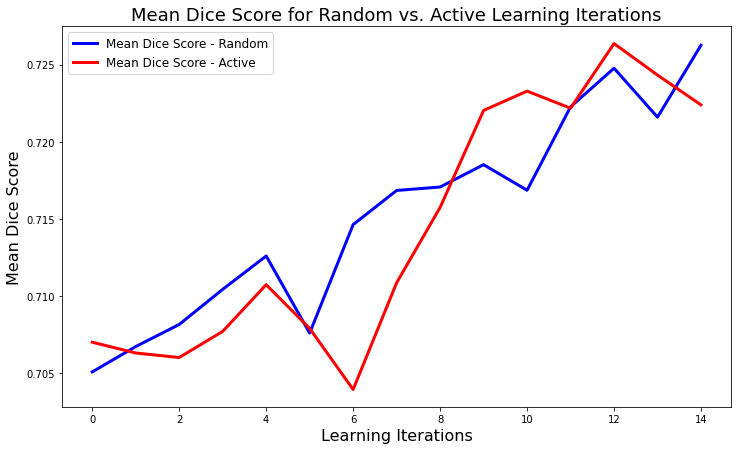

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(dice_random, 'b', linewidth=3.0, label='Mean Dice Score - Random')
plt.plot(dice_active, 'r', linewidth=3.0, label='Mean Dice Score - Active')
plt.title('Mean Dice Score for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Dice Score', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('comparison_results/Dice.png')
plt.show()

### PPV on Test Set, compared with Random Baseline

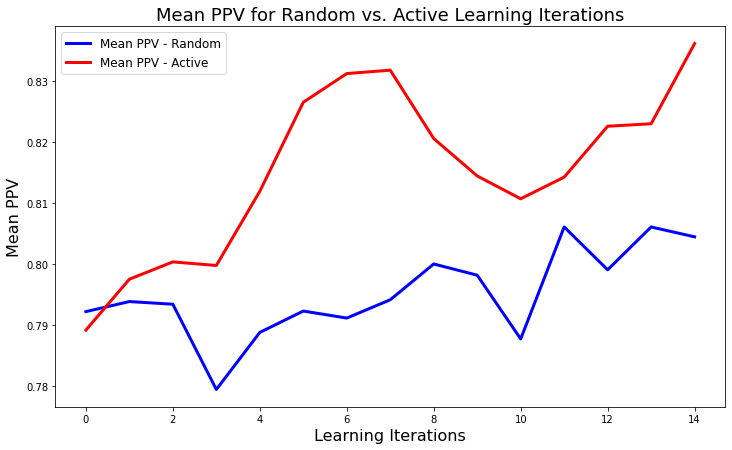

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(PPV_random, 'b', linewidth=3.0, label='Mean PPV - Random')
plt.plot(PPV_active, 'r', linewidth=3.0, label='Mean PPV - Active')
plt.title('Mean PPV for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean PPV', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('comparison_results/PPV.png')
plt.show()

### Sensitivity on Test Set, compared with Random Baseline

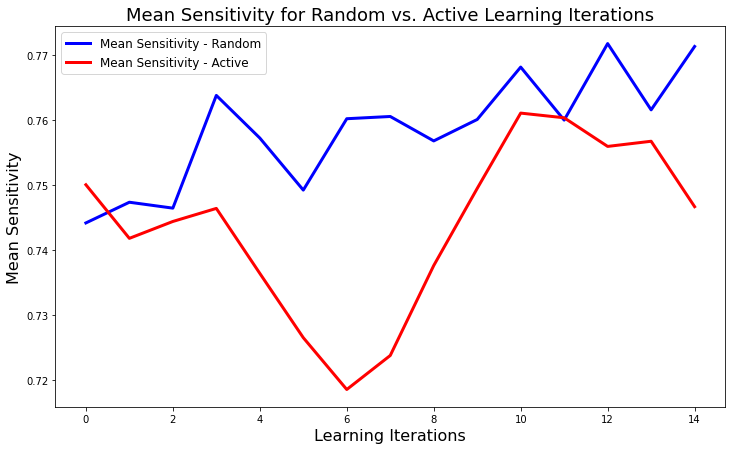

In [16]:
plt.figure(figsize=(12, 7))
plt.plot(sensitivity_random, 'b', linewidth=3.0, label='Mean Sensitivity - Random')
plt.plot(sensitivity_active, 'r', linewidth=3.0, label='Mean Sensitivity - Active')
plt.title('Mean Sensitivity for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Sensitivity', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('comparison_results/Sensitivity.png')
plt.show()

### Hausdorff on Test Set, compared with Random Baseline

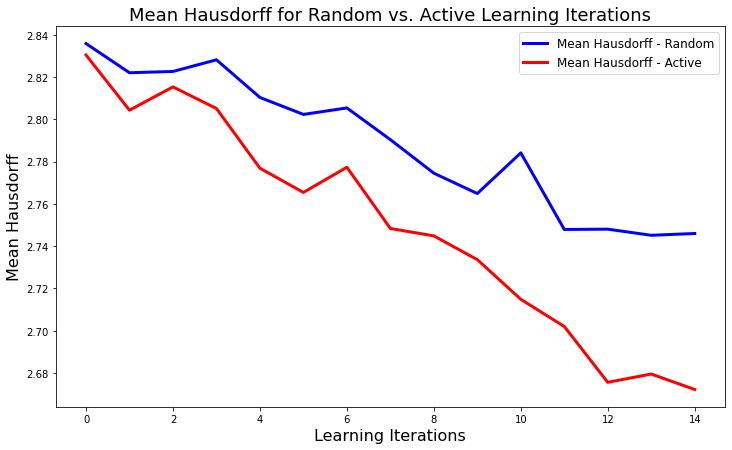

In [17]:
plt.figure(figsize=(12, 7))
plt.plot(Hausdorff_random, 'b', linewidth=3.0, label='Mean Hausdorff - Random')
plt.plot(Hausdorff_active, 'r', linewidth=3.0, label='Mean Hausdorff - Active')
plt.title('Mean Hausdorff for Random vs. Active Learning Iterations', fontsize=18)
plt.xlabel('Learning Iterations', fontsize=16)
plt.ylabel('Mean Hausdorff', fontsize=16)
plt.legend(fontsize=12)
plt.savefig('comparison_results/Hausdorff.png')
plt.show()

## Base-Trained Model vs. Actively-Trained Model vs. Random-Trained Model

In [5]:
mean_WT_dice_base = float(np.load("base_test_results\\mean_WT_dice.npy"))
mean_TC_dice_base = float(np.load("base_test_results\\mean_TC_dice.npy"))
mean_ET_dice_base = float(np.load("base_test_results\\mean_ET_dice.npy"))
dice_base = np.mean((mean_WT_dice_base, mean_TC_dice_base, mean_ET_dice_base))
mean_WT_PPV_base = float(np.load("base_test_results\\mean_WT_PPV.npy"))
mean_TC_PPV_base = float(np.load("base_test_results\\mean_TC_PPV.npy"))
mean_ET_PPV_base = float(np.load("base_test_results\\mean_ET_PPV.npy"))
PPV_base = np.mean((mean_WT_PPV_base, mean_TC_PPV_base, mean_ET_PPV_base))
mean_WT_sensitivity_base = float(np.load("base_test_results\\mean_WT_sensitivity.npy"))
mean_TC_sensitivity_base = float(np.load("base_test_results\\mean_TC_sensitivity.npy"))
mean_ET_sensitivity_base = float(np.load("base_test_results\\mean_ET_sensitivity.npy"))
sensitivity_base = np.mean((mean_WT_sensitivity_base, mean_TC_sensitivity_base, mean_ET_sensitivity_base))
mean_WT_Hausdorff_base = float(np.load("base_test_results\\mean_WT_Hausdorff.npy"))
mean_TC_Hausdorff_base = float(np.load("base_test_results\\mean_TC_Hausdorff.npy"))
mean_ET_Hausdorff_base = float(np.load("base_test_results\\mean_ET_Hausdorff.npy"))
Hausdorff_base = np.mean((mean_WT_Hausdorff_base, mean_TC_Hausdorff_base, mean_ET_Hausdorff_base))
std_WT_dice_base = np.load("base_test_results\\std_WT_dice.npy")
std_TC_dice_base = np.load("base_test_results\\std_TC_dice.npy")
std_ET_dice_base = np.load("base_test_results\\std_ET_dice.npy")
std_WT_PPV_base = np.load("base_test_results\\std_WT_PPV.npy")
std_TC_PPV_base = np.load("base_test_results\\std_TC_PPV.npy")
std_ET_PPV_base = np.load("base_test_results\\std_ET_PPV.npy")
std_WT_sensitivity_base = np.load("base_test_results\\std_WT_sensitivity.npy")
std_TC_sensitivity_base = np.load("base_test_results\\std_TC_sensitivity.npy")
std_ET_sensitivity_base = np.load("base_test_results\\std_ET_sensitivity.npy")
std_WT_Hausdorff_base = np.load("base_test_results\\std_WT_Hausdorff.npy")
std_TC_Hausdorff_base = np.load("base_test_results\\std_TC_Hausdorff.npy")
std_ET_Hausdorff_base = np.load("base_test_results\\std_ET_Hausdorff.npy")

In [8]:
base_vs_random_vs_active_df = pd.read_csv("comparison_results\\Basevs.Activevs.Random.csv")

In [9]:
base_vs_random_vs_active_df

,Unnamed: 0,WT,ET,TC,All Classes
0,Dice Score (Base),0.757,0.619,0.724,0.700
1,Dice Score (Random),0.776,0.656,0.745,0.726
2,Dice Score (Active),0.762,0.652,0.754,0.722
3,PPV (Base),0.837,0.692,0.845,0.791
4,PPV (Random),0.850,0.704,0.858,0.804
5,PPV (Active),0.883,0.744,0.881,0.836
6,Sensitivity (Base),0.761,0.660,0.780,0.734
7,Sensitivity (Random),0.794,0.723,0.790,0.771
8,Sensitivity (Active),0.757,0.692,0.790,0.747
9,Hausdorff (Base),2.980,3.320,2.200,2.820
